In [103]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [104]:
nb_classes = 10

# 28x28크기의 이미지 => 28x28 = 784
X = tf.placeholder(tf.float32 , shape=[None , 784])

# 0~9 digist -> 10개의 class
Y = tf.placeholder(tf.float32 , shape=[None , nb_classes])

In [105]:
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [106]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

cost = tf.reduce_mean(-tf.reduce_sum( Y * tf.log(hypothesis) , axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

In [107]:
#Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1) , tf.arg_max(Y,1))

#Calculate Accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct , tf.float32))

In [108]:
# 임포트한 input_data로 Data를 read
mnist = input_data.read_data_sets("MNIST_data/" , one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch : 0001 cost =  2.886851806
Epoch : 0002 cost =  1.036758596
Epoch : 0003 cost =  0.831392730
Epoch : 0004 cost =  0.733112157
Epoch : 0005 cost =  0.671485536
Epoch : 0006 cost =  0.627210570
Epoch : 0007 cost =  0.593576088
Epoch : 0008 cost =  0.566484298
Epoch : 0009 cost =  0.544193572
Epoch : 0010 cost =  0.525362035
Epoch : 0011 cost =  0.509024919
Epoch : 0012 cost =  0.494768457
Epoch : 0013 cost =  0.482325837
Epoch : 0014 cost =  0.471047331
Epoch : 0015 cost =  0.461062917
Learning Finished
Accuracy :  0.8909
6861
Label :  [4]
Prediction :  [4]


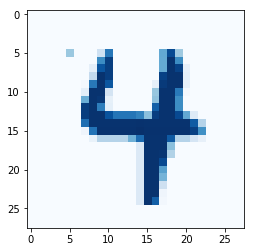

In [109]:
# epoch = 전체 데이터를 몇번씩 학습시킬지
training_epochs = 15

#size만큼의 traindata를 가져와서 학습을 시킴
batch_size = 100


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(training_epochs) :
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch) :
            batch_xs , batch_ys = mnist.train.next_batch(batch_size)
            c , _ = sess.run([cost , train] , feed_dict = { X : batch_xs, Y : batch_ys})
            avg_cost += c  / total_batch
        print('Epoch :' , '%04d' % (epochs +1 ) , 'cost = ', '{:.9f}'.format(avg_cost) )     
    
    print("Learning Finished")
   #Test the model using test sets
    print("Accuracy : ", accuracy.eval(session=sess , feed_dict={X : mnist.test.images , Y : mnist.test.labels}))     
    
    #mnist.test의 예제 중 하나를 랜덤으로 읽음
    r = random.randint(0, mnist.test.num_examples -1)
    print(r)
    print("Label : " , sess.run(tf.arg_max(mnist.test.labels[r:r+1] , 1)))  # mnist.test.labels리스트가 one_hot 이기에 arg_max를 이용
    print("Prediction : ", sess.run(tf.arg_max(hypothesis,1), feed_dict={X : mnist.test.images[r:r+1]} ))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28) , cmap = 'Blues' , interpolation ='nearest')
    plt.show()